# Investigating Different Forms of the Differential Heat Equation

In this notebook we will investigate the two forms of the heat equation. This will be done through the modelling of heat in a bar of length 21m and width 15m. The end of this bar (x=21m) will be kept at a constant 400K, all other boundries of the bar will be kept at 300K.

The first method will use a 2D steady state model, this will use the successive over-relaxation (SOR) approach to find the final temperature as a function of the coordinates. This method approches a steady state and does not take into account the path in which this is reached relative to time. The equation that this method solves has an eliptical form and is given by:

Equation 1:
$$
\frac{\partial^2\theta}{\partial x^2} + \frac{\partial^2\theta}{\partial y^2} = 0
$$

Where $\theta$ is a fucntion of temperature at (x,y). It is possible to apply a centred finite-difference scheme to this equation and after some assertions and re-arranging we have the equation given below that gives SOR approach:

Equation 2:
$$
{ϕ_{i,j}}^{(k+1)} = \frac{1+\omega}{4} ({ϕ_{i+1,j}}^{(k)}+{ϕ_{i-1,j}}^{(k)}+{ϕ_{i,j+1}}^{(k)}+{ϕ_{i,j-1}}^{(k)}) -ω{ϕ_{i,j}}^{(k)}
$$

Where i and j give index of the x and y cooridnates respectively, the k's and k+1's in brackets give the different versions of the temperatures, which are updated with a mix of old and new versions themsleves. This mix is decided by the parameter $\omega$.

The second method reaches the final state as a function of time and at each time the temperatures are given as a function of their coordinates. The equation used in this method has a parabolic form and is given by:

Equation 3:
$$
\frac{∂θ}{∂t}=\frac{κ}{Cρ}  \frac{∂^2 θ}{∂x^2}
$$

Where C is the specific heat capacity of the material, $\theta$ is the temperature, κ is the thermal conductivity and ρ is the mass density. Using the finite differences technique for the both of the derivatives and then re-arrange to give the formula:

Equation 4:
$$
θ_{i,n+1} = ζ(θ_{i+1,n}+θ_{i-1,n} )+(1-2ζ)θ_{i,n}
$$

Where i is the index for the coordinates and n is the index for times, separated by small differences dx and dt. This equation ois for a 1D distrubtution and will have more indexing in the 2D equations. This will be the method used below over an array to find the final state of the temperature distrubution due to Eq. 2.

In [40]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Creating SOR solver function

In [41]:
def update_GS_SOR(phi, M, N, omega):
    """Updating an MxN grid of temperatures using the SOR method.
    Inputs:
    M, N: dimension of the grid
    phi: intial temperatures guess
    omega: parameter in SOR method
    Returns: updated phi"""
    
    #applying SOR method
    for i in range(1,N-1):
        for j in range(1,M-1):
            phi[i,j] = (1+omega)*0.25*(phi[i-1,j] + phi[i+1,j] 
                              + phi[i,j-1] + phi[i,j+1]) - omega*phi[i,j]
    return phi

### Setting initial conditions and plotting

Text(0.5, 1.0, 'Fig 1: Initial Temperature Guess')

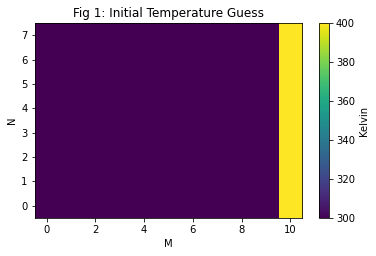

In [42]:
#creating guess
M = 11
N = 8
T1 = 300
T2 = 400
theta = T1 * np.ones((N,M))
theta[:,M-1] = T2

#plotting intial guess
plt.imshow(theta, origin='lower')
plt.xlabel('M')
plt.ylabel('N')
plt.colorbar(shrink=0.9,label='Kelvin')
plt.title('Fig 1: Initial Temperature Guess')


### Running the SOR Function and Plotting

In [43]:
omega = 0.7
delta = 1
tol = 1e-4
iter = 1
while  delta > tol:
    thetain = np.copy(theta)
    theta = update_GS_SOR(theta,M,N,omega)
    delta = np.max(np.abs(thetain-theta))
    iter += 1
print("Finished after ",iter," iterations")

Finished after  42  iterations


Text(0.5, 1.0, 'Fig 2: SOR Method Output')

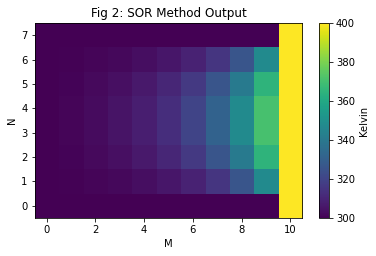

In [44]:
#plotting SOR method output
plt.imshow(theta, origin='lower')
plt.xlabel('M')
plt.ylabel('N')
plt.colorbar(shrink=0.9,label='Kelvin')
plt.title('Fig 2: SOR Method Output')

### 4. Time evolution function

In [58]:
def update_temperature2D(temper, M, N, zeta):
    """Perform explicit forward FD update for heat equation
    Inputs:
    temper  Array of temperature at present timestep
    n       Temperature timestep to calculate
    zeta    Constant of proportionality
    """
    #intialising temper_next
    tempNlen = np.size(temper,0)
    tempMlen = np.size(temper,1)
    temper_next = np.zeros((tempNlen,tempMlen))
    
    #updating
    for i in range(1,(tempNlen-1)): 
        for j in range(1,tempMlen-1):
            temper_next[i,j] = temper[i,j] + zeta*(temper[i+1,j] + temper[i-1,j] 
                                                   + temper[i,j+1] + temper[i,j-1] - 4*temper[i,j])
    return temper_next

### 5. Set up initial conditions

Text(0.5, 1.0, 'Fig 3: Initial Temperature Guess')

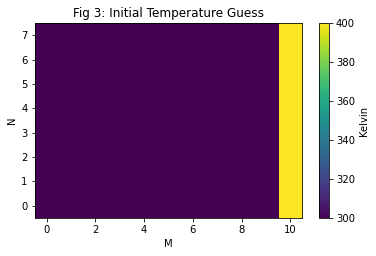

In [59]:
M = 11
N = 8
T1 = 300
T2 = 400
theta0 = T1 * np.ones((N,M))
theta0[:,M-1] = T2

#plotting intial guess
plt.imshow(theta0, origin='lower')
plt.xlabel('M')
plt.ylabel('N')
plt.colorbar(shrink=0.9,label='Kelvin')
plt.title('Fig 3: Initial Temperature Guess')

### 6. Propagate the solution and store selected points

In [80]:
Nt = 400
zeta = 0.1
for i in range(Nt):
    theta_next = update_temperature2D(theta0,M,N,zeta)
    theta0 = theta_next
    theta0[:,M-1] = T2
    theta0[:,0] = T1
    theta0[0,0:M-1] = T1
    theta0[N-1,0:M-1] = T1

### Plotting the final and steady-state solutions
Below, we also plot the difference between the two solutions.

Text(0.5, 1.0, 'Fig 4: Final Temperature Guess')

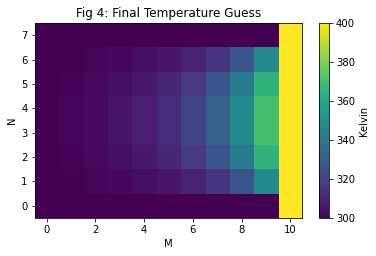

In [76]:
#plotting final state
plt.imshow(theta0, origin='lower')
plt.xlabel('M')
plt.ylabel('N')
plt.colorbar(shrink=0.9,label='Kelvin')
plt.title('Fig 4: Final Temperature')

Text(0.5, 1.0, 'Fig 5: Different between Final Temperatures')

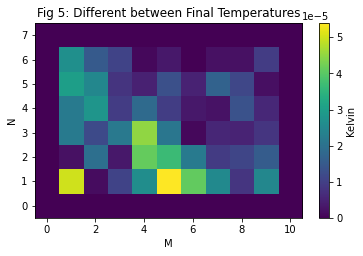

In [78]:
diff = np.abs(theta0-theta)
plt.imshow(diff, origin='lower')
plt.xlabel('M')
plt.ylabel('N')
plt.colorbar(shrink=0.9,label='Kelvin')
plt.title('Fig 5: Different between Final Temperatures')

## Conclusion

THe difference between these two methods is extremely small given the size of the intial temperatures, these two methods are both fairly accurate and efficient in nature. In figure 5 it is possible to see the larger differences in temperature come from the bottom left corner, there is no clear explanation for this trend, this could be researched further.